In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Initialize the neural network, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')


Using device: cuda
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.334702
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.164945
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.459603
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.375379
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.138579
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.129283
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.152718
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.180123
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.106545
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.067413
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.126197
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.060198
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.151002
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.131774
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.053460
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.023162
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.090389
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.110887
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.075413
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.

In [3]:
!pip install tensorflow

  Using cached tensorflow-2.6.2-cp36-cp36m-win_amd64.whl (423.3 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached grpcio-1.48.2-cp36-cp36m-win_amd64.whl (3.6 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached h5py-3.1.0-cp36-cp36m-win_amd64.whl (2.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.19.6-cp36-cp36m-win_amd64.whl (897 kB)
  Using cached termcolor-1.1.0-py3-

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# Define a simple convolutional neural network
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images[..., np.newaxis], train_labels, epochs=5, batch_size=64, validation_split=0.1, verbose=0)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
# print(f'\nTest accuracy: {test_acc}')


Num GPUs Available:  1
313/313 - 1s - loss: 0.0317 - accuracy: 0.9893


# Pytorch practice

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [11]:
x = torch.rand(3, 4, dtype=torch.float32)
print(x, '\n')

x = torch.zeros(5, 3, dtype=torch.long)
print(x, '\n')

x = x.new_ones(5, 3, dtype=torch.float64)
print(x, '\n')

x = torch.tensor([4.123, 3])
print(x, '\n')

x = torch.randn_like(x, dtype=torch.float32)
print(x, '\n')

x = torch.Tensor(5, 3).fill_(7)
print(x, '\n')

tensor([[0.9944, 0.3831, 0.2858, 0.0196],
        [0.9908, 0.1881, 0.7989, 0.2649],
        [0.6718, 0.2081, 0.5266, 0.8003]]) 

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) 

tensor([4.1230, 3.0000]) 

tensor([-1.0302,  0.5135]) 

tensor([[7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.]]) 



ค่า a เปลี่ยนตาม t

In [18]:
import torch 
a = np.array([1, 2])
b = torch.from_numpy(a)
print(a)
print(b)
b += 1
print(a)
print(b)

[1 2]
tensor([1, 2], dtype=torch.int32)
[2 3]
tensor([2, 3], dtype=torch.int32)


ค่า a ไม่เปลี่ยนตาม t

In [16]:
import numpy as np 
a = np.array([1., 3.])
t = torch.Tensor(a)
print(t)
print(a)
t += 1
print(t)
print(a)

tensor([1., 3.])
[1. 3.]
tensor([2., 4.])
[1. 3.]


ค่า t เปลี่ยนตาม b

In [20]:
t = torch.Tensor([2, 3])
b = t.numpy()
print(b)
b += 1
print(t)
print(b)

[2. 3.]
tensor([3., 4.])
[3. 4.]


ค่า t ไม่เปลี่ยนตาม b

In [22]:
t = torch.Tensor([2, 3])
b = np.array(t.data)
print(b)
b += 1
print(t)
print(b)

[2. 3.]
tensor([2., 3.])
[3. 4.]


Math operations

In [28]:
t1 = torch.ones(5, 3)
t2 = torch.zeros(5, 3)

print("t1 + t2")
print(t1 + t2)

print("t1 - t2")
print(t1 - t2)

print("t1 x t2")
print(t1*t2)

t1 + t2
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t1 - t2
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t1 x t2
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


Dot product

In [30]:
t1 = torch.ones(5, 3)
t2 = torch.Tensor(3, 5).fill_(2)

print("Dot product")
print(torch.matmul(t1, t2))

Dot product
tensor([[6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.]])


Stats operations

In [31]:
t = torch.ones(5, 3)
print(t.mean())
print(t.sum())
print(t.std())
print(t.max())
print(t.min())

tensor(1.)
tensor(15.)
tensor(0.)
tensor(1.)
tensor(1.)


Reshape tensor
- ในการใช้คำสั่งเปลี่ยนขนาด Tensor เราสามารถใช้ คำสั่ง .view([row],[column]) ดังนี้

In [34]:
t = torch.ones(5, 3)
print(t.view(1, 15))
print(t.view(3, 5))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


Reshape to 1-Dimension

In [38]:
t = torch.Tensor(3, 4).fill_(3)
print(t.flatten())

tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])


การใช้ GPU
- การทำให้ Pytorch สามารถคำนวณ Tensor โดยใช้ GPU ได้นั้นก็จะมีการเขียนเพิ่มเติมนิดนึงดังนี้

In [40]:
device = torch.device('cuda')
t = torch.ones(5, 3).to(device)

Differentiation 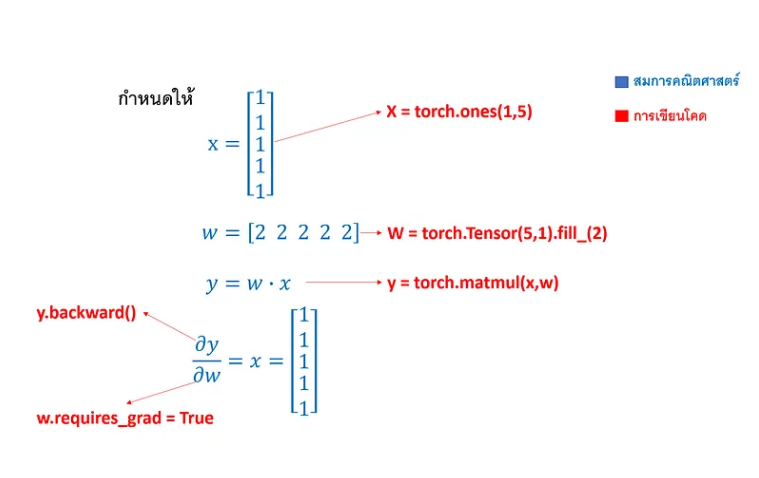

In [43]:
x = torch.ones(1, 5)
w = torch.Tensor(5, 1).fill_(2)

w.requires_grad = True
y = torch.matmul(x, w)

y.backward()
print(y.grad)
print(w.grad)
print(x.grad)

None
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
None


Neural Network

In [46]:
linear_layer = torch.nn.Linear(2, 3)

In [47]:
linear_layer.weight

Parameter containing:
tensor([[-0.2940, -0.0778],
        [ 0.4077,  0.4192],
        [-0.0571, -0.0509]], requires_grad=True)

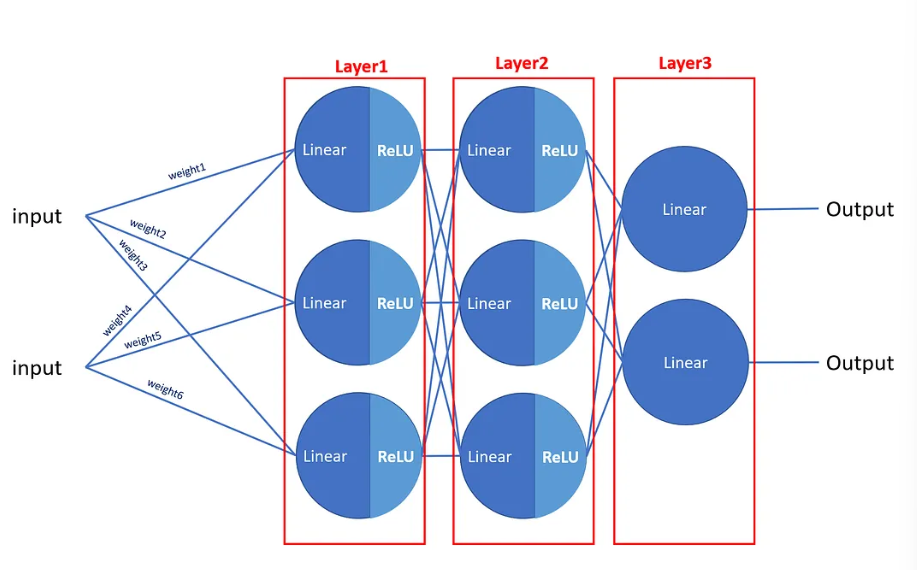

In [52]:
import torch
import torch.nn.functional as F

class TestNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(TestNeuralNetwork, self).__init__()
        self.linearLayer1 = torch.nn.Linear(2, 3)
        self.linearLayer2 = torch.nn.Linear(3, 3)
        self.linearLayer3 = torch.nn.Linear(3, 2)
        
    def forward(self, x):
        h1 = self.linearLayer1(x)
        a1 = F.relu(h1)
        h2 = self.linearLayer2(a1)
        a2 = F.relu(h2)
        h3 = self.linearLayer3(a2)
        return h3

nn = TestNeuralNetwork()

input = torch.Tensor([1, 1])
output = nn(input)
print(output)

tensor([ 0.3485, -0.2209], grad_fn=<AddBackward0>)


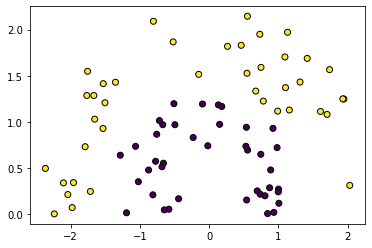

In [59]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(2).repeat(40)
r = np.random.normal(z+1, 0.25)
t = np.random.uniform(0, np.pi, 80)
x = r*np.cos(t)
y = r*np.sin(t)
X = np.array([x, y]).T
plt.scatter(x, y, c=z, edgecolor='k')
plt.show()

In [67]:
import torch
import torch.nn.functional as F

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = torch.nn.Linear(2, 3)
        self.linear2 = torch.nn.Linear(3, 3)
        self.linear3 = torch.nn.Linear(3, 2)
    
    def forward(self, x):
        h1 = self.linear1(x)
        a1 = F.relu(h1)
        h2 = self.linear2(a1)
        a2 = F.relu(h2)
        h3 = self.linear3(a2)
        return h3

X = torch.Tensor(X)
z = torch.LongTensor(z)

nn = NeuralNetwork()
optimizer = torch.optim.Adam(nn.parameters(), lr=0.1)
cross_entropy = torch.nn.CrossEntropyLoss()

for i in range(200):
    a = nn(X)
    output = cross_entropy(a, z)
    output.backward()
    optimizer.step()
    optimizer.zero_grad()

In [8]:
import tensorflow as tf

# Check if TensorFlow is built with GPU support
print("Built with GPU support:", tf.test.is_built_with_cuda())

# List physical GPUs available
physical_devices = tf.config.list_physical_devices('GPU')
print("Physical GPUs available:", physical_devices)

# Verify TensorFlow can use the GPU
tf.debugging.set_log_device_placement(True)

# Perform a simple operation
a = tf.constant([[1.0, 2.0, 3.0]])
b = tf.constant([[1.0], [2.0], [3.0]])
c = tf.matmul(a, b)
print("Result of matrix multiplication:", c)


Built with GPU support: True
Physical GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Result of matrix multiplication: tf.Tensor([[14.]], shape=(1, 1), dtype=float32)


In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


Physical devices cannot be modified after being initialized
